# LogRegTest
Predicting the sentiment(positive/negative) of movie reviews

# import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import string

from nltk.corpus import stopwords          
from nltk.stem import PorterStemmer        
from nltk.tokenize import word_tokenize

from sklearn import metrics
from sklearn.linear_model import LogisticRegression

print("Imports complete.")

Imports complete.


# data

In [2]:
train=pd.read_csv("Train.csv")  # FROM https://thecleverprogrammer.com/2020/12/07/sentiment-analysis-with-python/
test=pd.read_csv("Test.csv")
train.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


<BarContainer object of 2 artists>

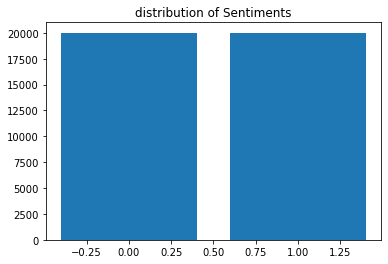

In [3]:
plt.title("distribution of Sentiments")
plt.bar(train.label.unique(),train.label.value_counts()) # =50/50

In [4]:
trainY=train.pop("label")
testY=test.pop("label")

trainY=np.array(trainY)
testY=np.array(testY)

In [5]:
train=train.values.tolist()
test=test.values.tolist()
#flatten the lists
train = [item for sublist in train for item in sublist]
test = [item for sublist in test for item in sublist]
test[1]

"1st watched 12/7/2002 - 3 out of 10(Dir-Steve Purcell): Typical Mary Kate & Ashley fare with a few more kisses. It looks to me like the girls are getting pretty tired of this stuff and it will be interesting what happens to them if they ever decide to split up and go there own ways. In this episode of their adventures they are interns in Rome for a `fashion' designer who puts them right into the mailroom to learn what working hard is all about(I guess..). Besides the typical flirtations with boys there is nothing much else except the Rome scenario until about ¾ way into the movie when it's finally revealed why they are getting fired, then re-hired, then fired again, then re-hired again. This is definetly made by people who don't understand the corporate world and it shows in their interpretation of it. Maybe the real world will be their next adventure(if there is one.). Even my kids didn't seem to care for this boring `adventure' in the make-believe. Let's see they probably only have 

In [6]:
# nltk.download('stopwords')
# nltk.download('punkt')
stopwords_english = stopwords.words('english')

In [7]:
def process_text(text):
    token = word_tokenize(text)
    clean = []
    
    for word in token: # Go through every word in your tokens list
        if (word not in stopwords_english and  word not in string.punctuation):  
            clean.append(word)
    
    return clean

In [8]:
def build_freqs(texts, sentiments):
    
    yslist = np.squeeze(sentiments).tolist()    
    freqs = {}
    for y, text in zip(yslist, texts):
        for word in process_text(text):
            pair = (word, y)
            freqs[pair] = freqs.get(pair, 0) + 1
    
    return freqs

In [9]:
freqDict = build_freqs(train, trainY)

In [10]:
def extract_features(text, freqs):# creating feature vectors

    word_l = process_text(text)

    x = np.zeros((1, 3)) # 3=2 sentiments + bias
    x[0,0] = 1
    
    for word in word_l:
        if (word, 0) in freqs:
            x[0,1] += freqs[(word, 0.0)]
        if (word, 1) in freqs:
            x[0,2] += freqs[(word, 1.0)]

    return x

In [11]:
trainNew=np.zeros((len(train), 3))
testNew=np.zeros((len(test), 3))

for i in range(len(train)):
    trainNew[i, :]= extract_features(train[i], freqDict)

for i in range(len(test)):
    testNew[i, :]= extract_features(test[i], freqDict)
trainNew

array([[1.000000e+00, 5.105800e+05, 4.685480e+05],
       [1.000000e+00, 2.265441e+06, 2.009915e+06],
       [1.000000e+00, 8.659350e+05, 8.015340e+05],
       ...,
       [1.000000e+00, 8.243790e+05, 7.454330e+05],
       [1.000000e+00, 1.037215e+06, 9.930010e+05],
       [1.000000e+00, 9.001490e+05, 8.663870e+05]])

# Model

In [12]:
# def sigmoid(z): # could have imported
#     h = 1/(1+np.exp(-z))
#     return h

In [13]:
# def LogReg(x, y, theta, alpha, num_iters): # log regression gradient descent

#     m = x.shape[0]

#     for i in range(0, num_iters):
        
#         z = x.dot(theta)
#         h = sigmoid(z)
#         J = np.dot(-1./m, (y.T.dot(np.log(h)) + (1-y).T.dot(np.log(1-h))))

#         theta = theta - np.dot(alpha/m, (x.T.dot(h-y)))
        
#         if i+1%5==0:
#             print("cost"+J)

#     J = float(J)
#     return J, theta

In [14]:
# def test_logistic_regression(test_x, test_y, freqs, theta):

#     y_hat = []
    
#     for text in test_x:
        
#         y_pred = predict_tweet(text, freqs, theta)
        
#         if y_pred > 0.5:
#             y_hat.append(1)
#         else:
#             y_hat.append(0)

    
#     y_hat= np.asarray(y_hat)
#     test_y= np.squeeze(test_y)

#     compare = y_hat==test_y
    
#     accuracy = np.count_nonzero(compare==True)/len(compare)

#     return accuracy

In [15]:
# too slow + overflow, should create batches... but the point of the exercice is to test the vevtorisation, so I will use sklearn
# cost, theta = LogReg(trainNew, trainY,  np.zeros((3, 1)), .2, 10)
# cost, theta = LogReg(trainNew, trainY,  theta, .02, 10)
# cost, theta = LogReg(trainNew, trainY,  theta, .002, 100)
# print(cost)

In [16]:
Reg =LogisticRegression(max_iter=500).fit(trainNew,trainY)
pred = Reg.predict(testNew)

print("Accuracy:", metrics.accuracy_score(testY, pred))

Accuracy: 0.6688


<BarContainer object of 2 artists>

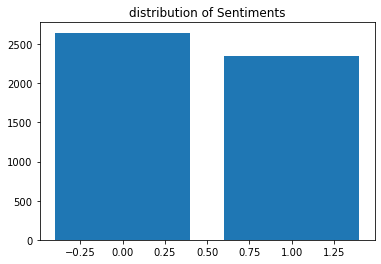

In [17]:
import collections

keys=[0,1]

nrDict=collections.Counter(pred)
values = list( map(nrDict.get, keys) )

plt.title("distribution of Sentiments")
plt.bar(x=keys, height=values)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

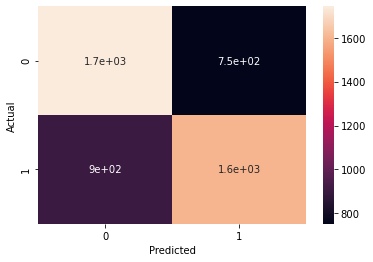

In [18]:
df = pd.DataFrame({'Actual':   testY, 'Predicted': pred})

confusion_matrix = pd.crosstab(df['Actual'], df['Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)

The results are worse than I expected.